In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# This is used if the dataset if stored in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset

In [26]:
'''
Load the dataframe in csv
substitute the name of csv file 'volkswagen_e_golf.csv' by the data we interested
'''
# dataset = pd.read_csv('/content/drive/MyDrive/Courses/1. Chem 545 546/Project/volkswagen_e_golf.csv',encoding='latin-1')

dataset0 = pd.read_csv('/content/drive/MyDrive/Chem 545 546/Project/Prediction_Tensorflow/all_data.csv',encoding='latin-1')

df = pd.DataFrame(dataset0)

dataset0.head()


,Unnamed: 0,ZIPCODE,Year,AAWDT,Total_Population,Pop_fraction,RACK_CAPACITY,Miles_Bike_Lanes,Sidewalk_length
0,0,98101,2007,264800.0,9478.973121,0.016191,2.0,NaN,3665.75966
1,1,98101,2008,254100.0,9583.147981,0.016191,2.0,0.320152,NaN
2,2,98101,2009,254100.0,9691.127797,0.016191,2.0,0.263767,NaN
3,3,98101,2010,257900.0,9855.000000,0.016191,2.0,NaN,NaN
4,4,98101,2011,353100.0,10082.228781,0.016191,2.0,NaN,NaN


In [27]:
dataset0.isna().sum()

Unnamed: 0            0
ZIPCODE               0
Year                  0
AAWDT                 0
Total_Population      6
Pop_fraction          6
RACK_CAPACITY       102
Miles_Bike_Lanes    201
Sidewalk_length     294
dtype: int64

In [28]:
# clean the data
dataset0 = dataset0.dropna()
dataset0.isna().sum()

Unnamed: 0          0
ZIPCODE             0
Year                0
AAWDT               0
Total_Population    0
Pop_fraction        0
RACK_CAPACITY       0
Miles_Bike_Lanes    0
Sidewalk_length     0
dtype: int64

# Get the features and lebels

In [29]:
'''
Here specify the features and labels
'''
# Normlized
features_select = ['Total_Population','Pop_fraction', 'RACK_CAPACITY',] # name of features
label_select = ['AAWDT'] # name of label

#### Note the the prediction should use the same Normlization
dataset=(dataset-dataset0.mean())/dataset0.std() # Normlized the data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset[features_select]
test_features = test_dataset[features_select]

train_labels = train_dataset[label_select]
test_labels = test_dataset[label_select]

# Import the prediction function

In [6]:
import pickle

# load the weights of neural network
f = open('/content/drive/MyDrive/Chem 545 546/Project/Prediction_Tensorflow/Weights/Weights_MultiFeatures.pckl', 'rb')
[W1, b1, W2, b2,W3, b3]= pickle.load(f)
f.close()

In [40]:

def Predict_function(Predict_input,W1, b1, W2, b2,W3, b3):
    '''
    The prediction function represented by neural network with tanh activation
    Predict_input is the data after normlization
    '''
    Predict_output=function_tanh(function_tanh(Predict_input@W1+b1)@W2+b2)@W3+b3
    return Predict_output

def Predict_function_Normalization(Predict_input,Norm_mean,Norm_std,W1, b1, W2, b2,W3, b3):
    '''
    The prediction function represented by neural network with tanh activation
    Predict_input is the raw data withour normlization
    Predict_df is the dataframe for prediction
    '''
    Predict_input=(Predict_input-Norm_mean)/Norm_std
    Predict_output=function_tanh(function_tanh(Predict_input@W1+b1)@W2+b2)@W3+b3
    return Predict_output

def function_tanh(x):
    y=( 2 / (1 + np.exp(-2*x) ) ) -1
    return y

In [14]:
'''
Here shows how to use the function for prediction with the features after normalization
'''
Predict_function(train_features.values,W1, b1, W2, b2,W3, b3)

array([[-0.3130774 ],
       [ 1.95784411],
       [ 1.50129007],
       [-0.76515669],
       [ 0.24825796],
       [ 1.92250622],
       [-0.50016211],
       [ 0.93236082],
       [-0.50451283],
       [-0.5839951 ],
       [-0.66592147],
       [-0.76173567],
       [ 0.05609762],
       [-1.06154916],
       [ 1.18099404]])

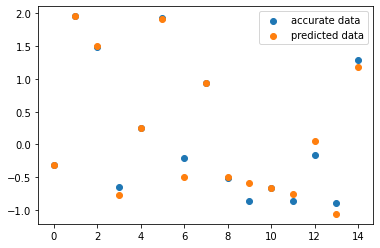

In [17]:
# Compare the true labels and the predicted labels
plt.scatter(range(np.shape(train_labels.values)[0]),train_labels.values,label='accurate data')
plt.scatter(range(np.shape(train_labels.values)[0]),Predict_function(train_features.values,W1, b1, W2, b2,W3, b3),label='predicted data')
plt.legend()


# Test changeing one feature by proportion

In [51]:
feature0 = dataset0.mean()[features_select]
list_propotion = np.arange(0,2,0.2)
feature_idx = 0
list_prediction = []
Norm_mean = dataset0.mean()[features_select]
Norm_std = dataset0.std()[features_select]
label_mean = dataset0.mean()[label_select]
label_std = dataset0.std()[label_select]

for propotion in list_propotion:
    feature_test = feature0.copy()
    feature_test[feature_idx] = feature0[feature_idx]*propotion
    Label_test = Predict_function_Normalization(feature_test,Norm_mean,Norm_std,W1, b1, W2, b2,W3, b3)
    list_prediction.append(Label_test*label_std+label_mean)

Text(0.5, 1.0, 'Total_Population')

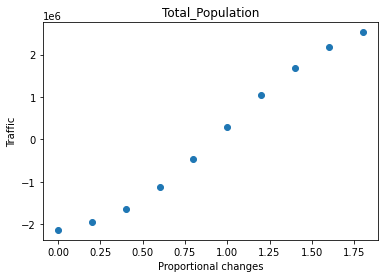

In [52]:
plt.scatter(list_propotion,list_prediction)
plt.xlabel('Proportional changes')
plt.ylabel('Traffic')
plt.title(features_select[feature_idx])